<a href="https://colab.research.google.com/github/aditisingh2912/Intro-to-CV/blob/main/OpenCV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

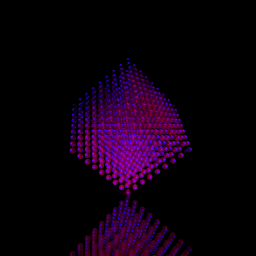

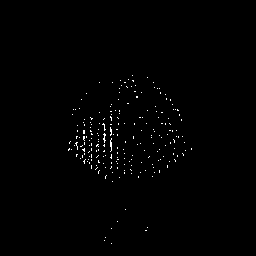

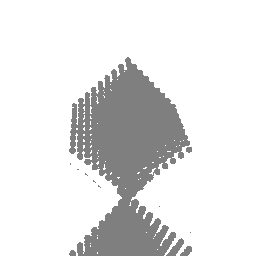

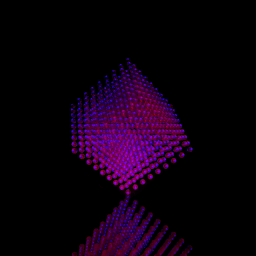

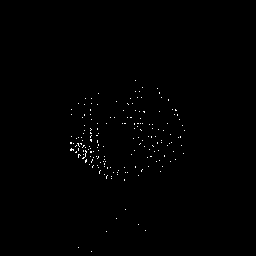

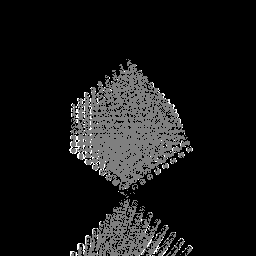

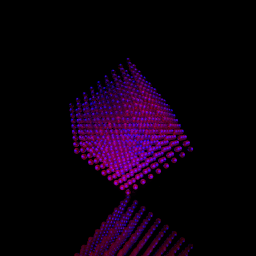

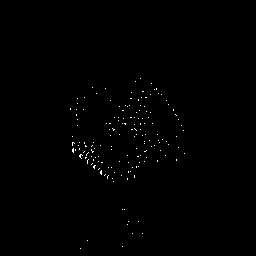

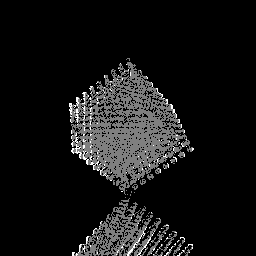

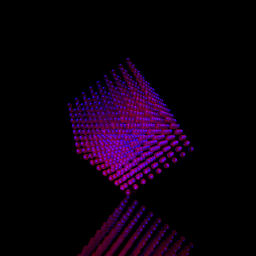

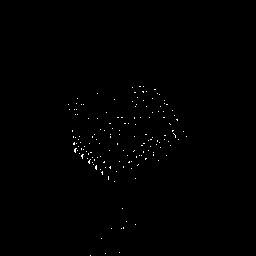

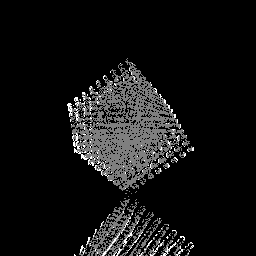

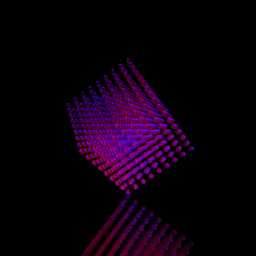

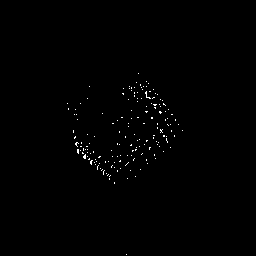

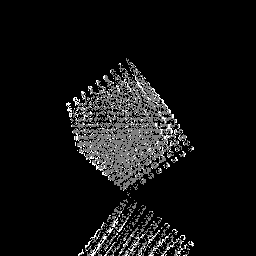

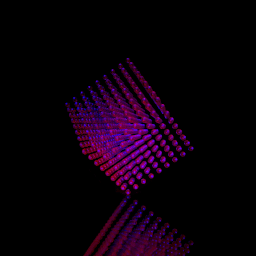

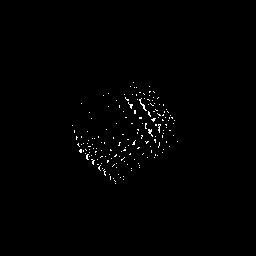

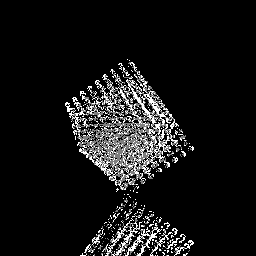

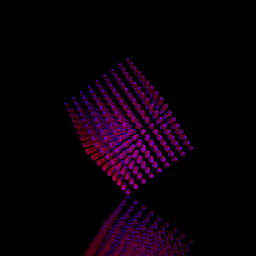

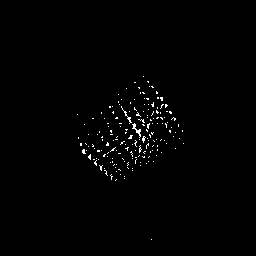

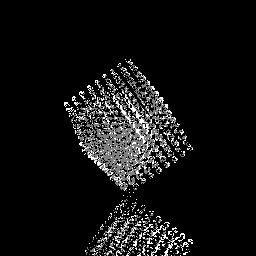

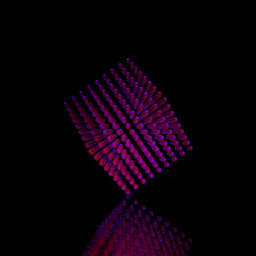

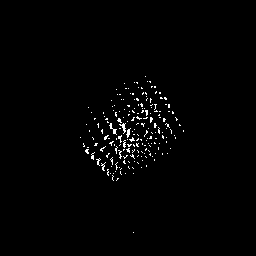

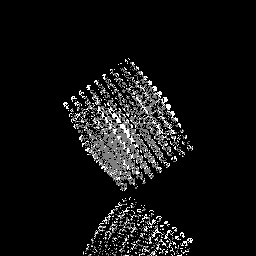

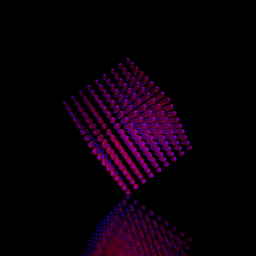

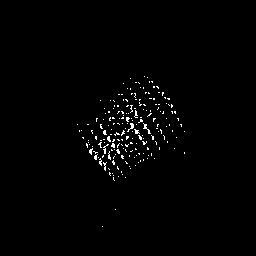

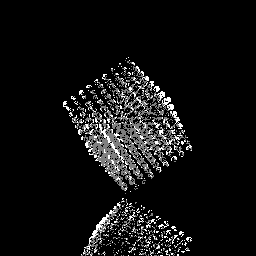

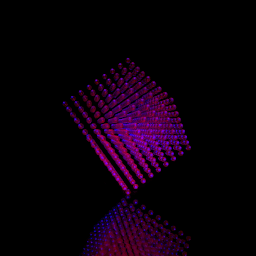

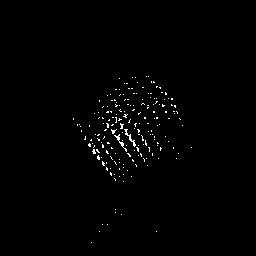

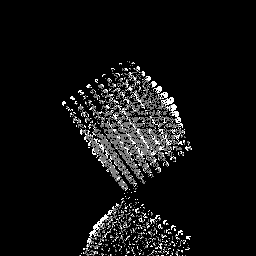

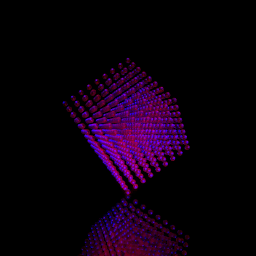

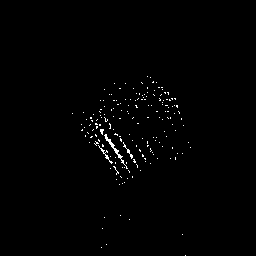

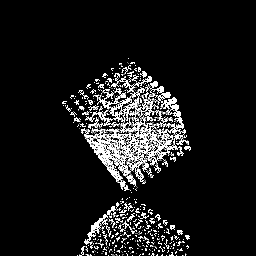

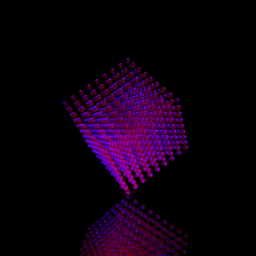

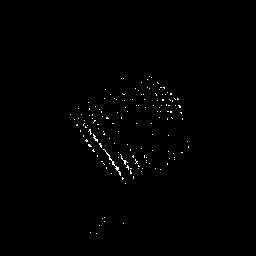

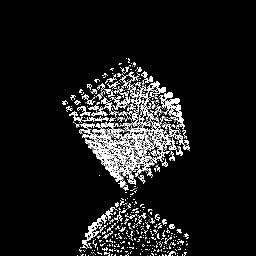

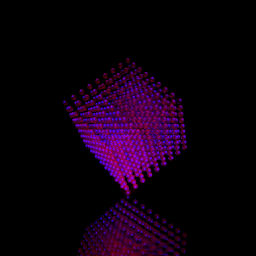

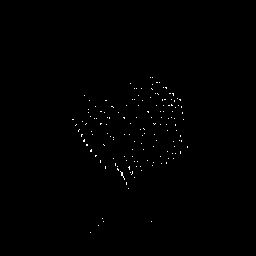

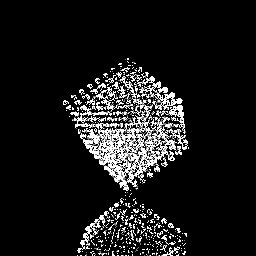

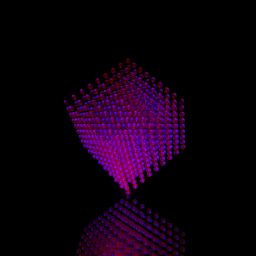

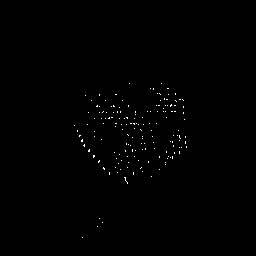

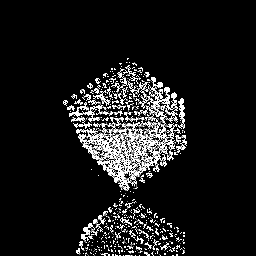

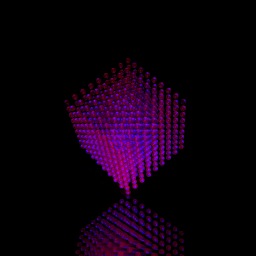

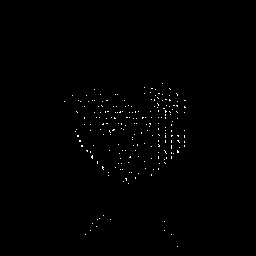

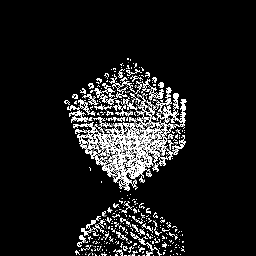

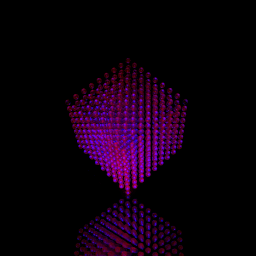

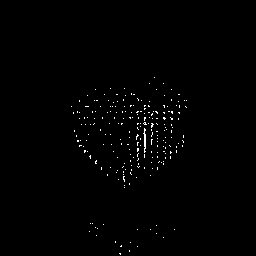

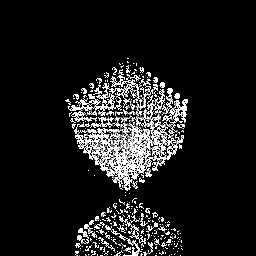

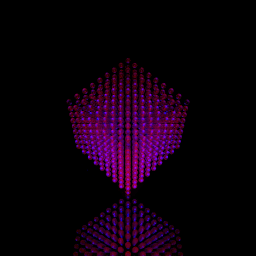

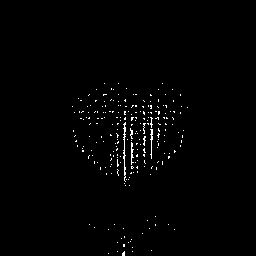

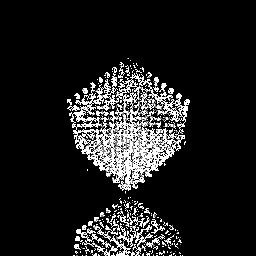

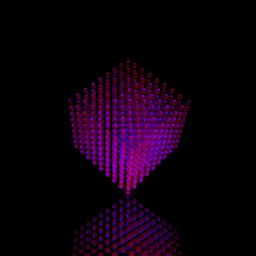

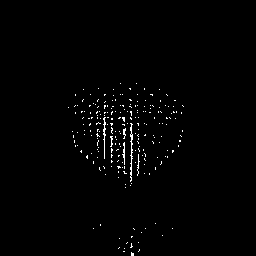

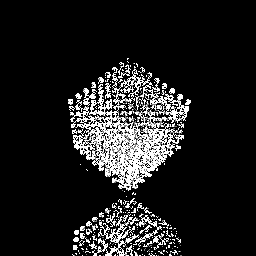

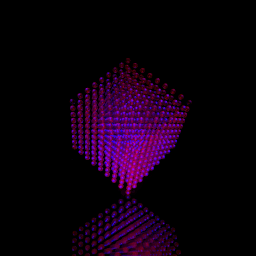

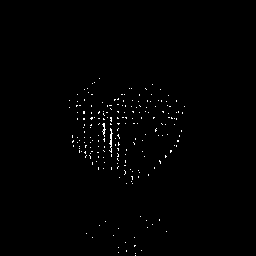

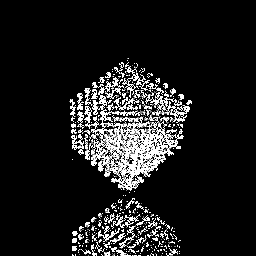

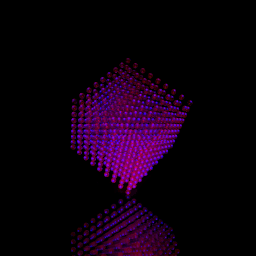

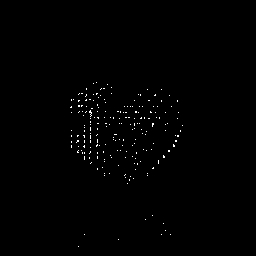

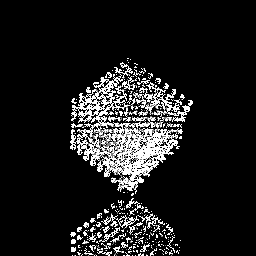

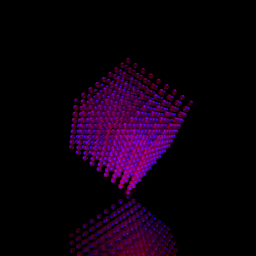

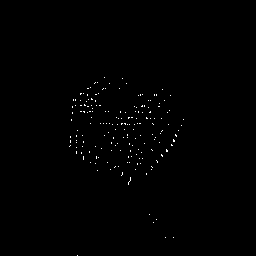

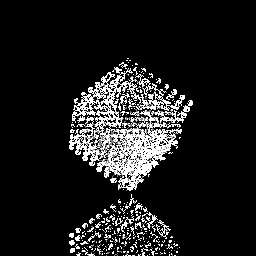

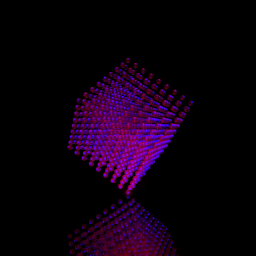

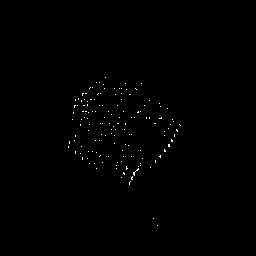

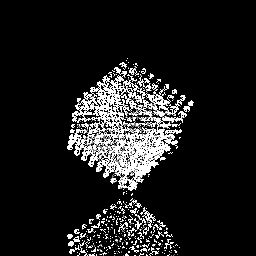

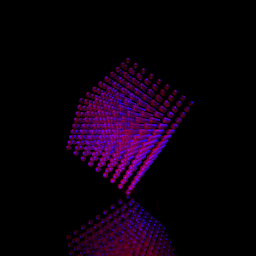

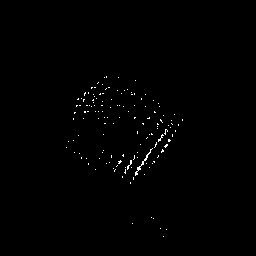

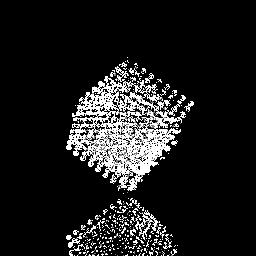

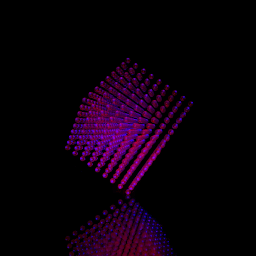

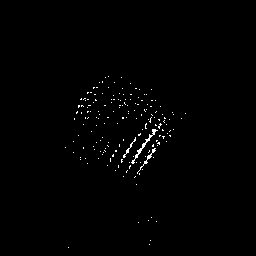

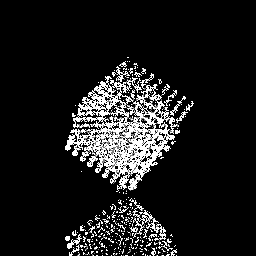

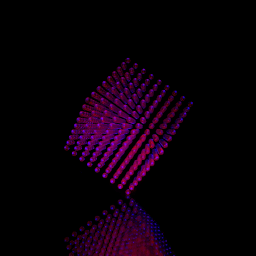

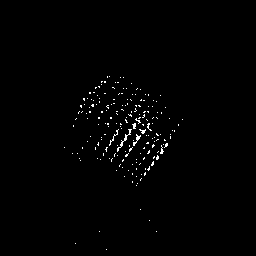

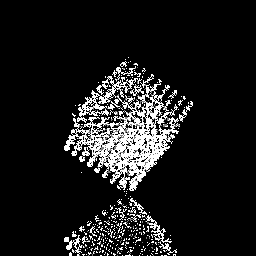

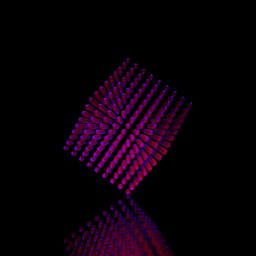

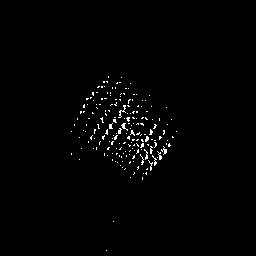

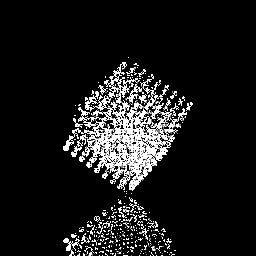

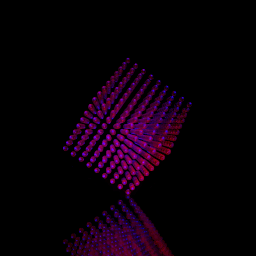

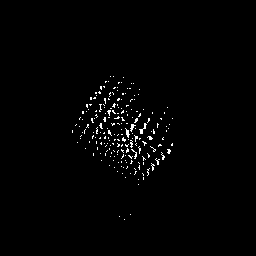

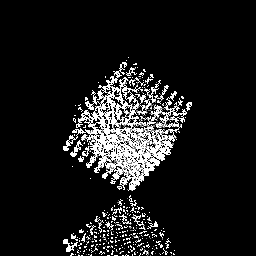

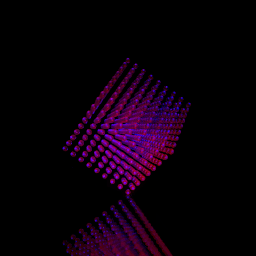

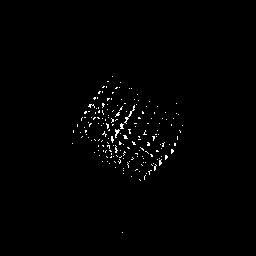

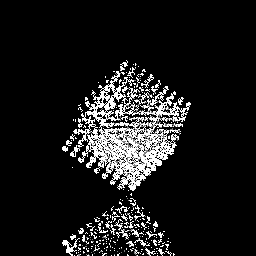

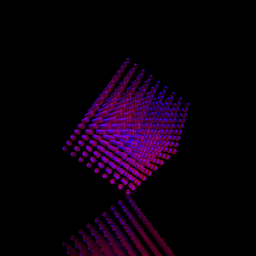

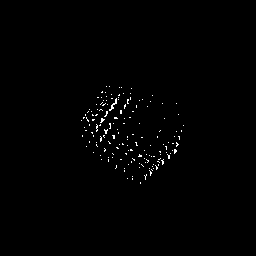

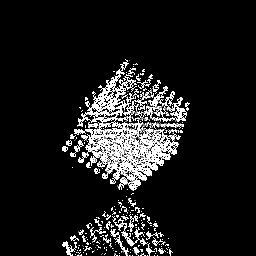

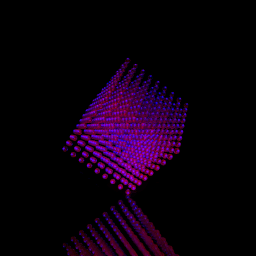

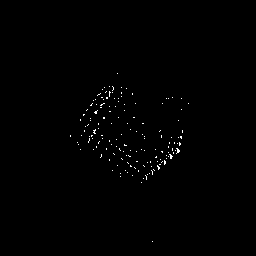

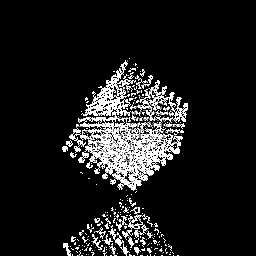

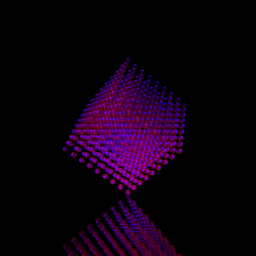

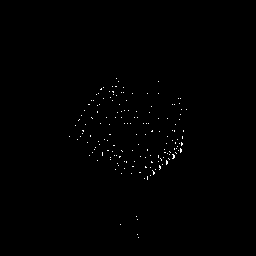

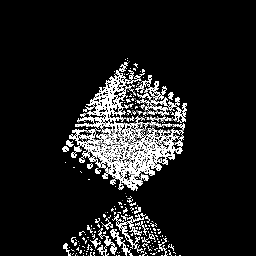

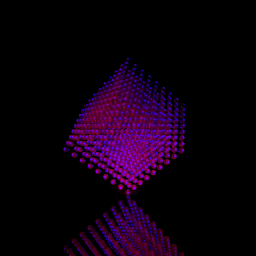

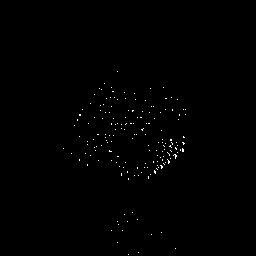

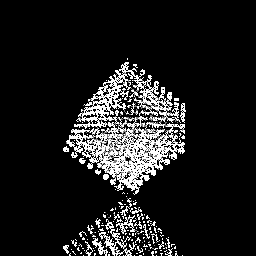

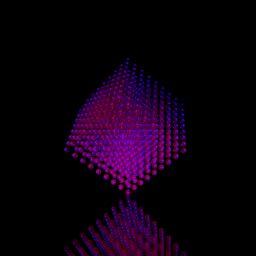

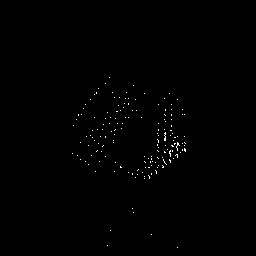

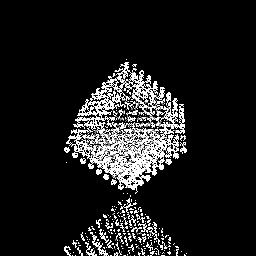

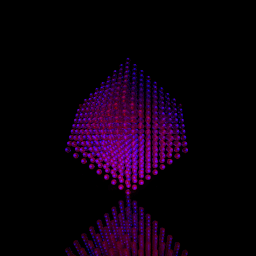

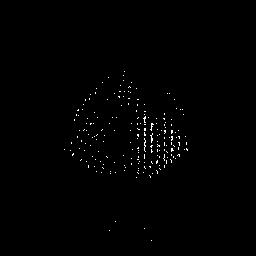

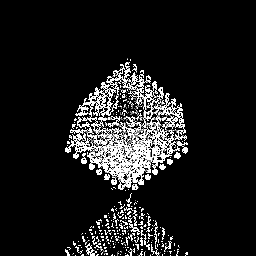

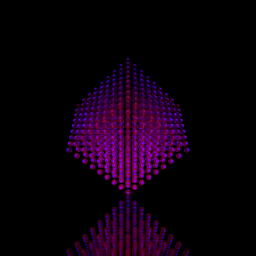

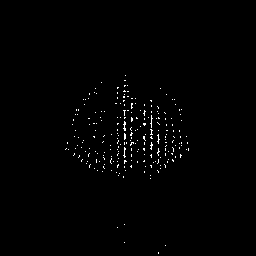

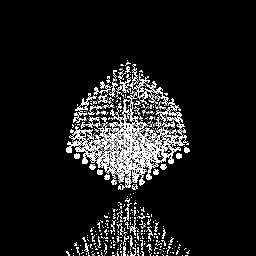

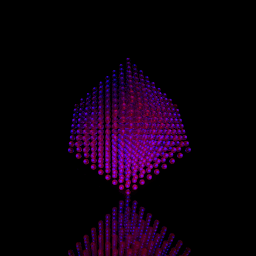

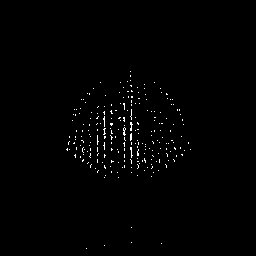

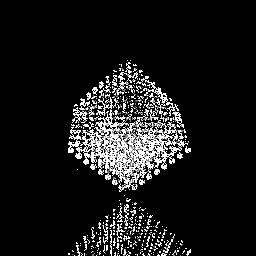

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture("/content/drive/MyDrive/gif1.gif")

if not cap.isOpened():
    print("Error: Unable to open the video file.")
    exit()

bg_subtractor = cv2.createBackgroundSubtractorMOG2()
ret, frame1 = cap.read()
if not ret:
    print("Error: Could not read the first frame.")
    exit()

gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

while True:
    ret, frame2 = cap.read()
    if not ret:
        break


    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray1, gray2)
    _, motion_mask = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    foreground_mask = bg_subtractor.apply(frame2)

    # Display results using cv2_imshow instead of cv2.imshow
    cv2_imshow(frame2)
    cv2_imshow(motion_mask)
    cv2_imshow(foreground_mask)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    gray1 = gray2.copy()

cap.release()
cv2.destroyAllWindows()

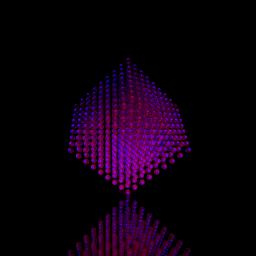

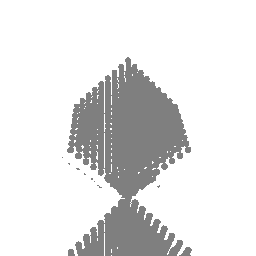

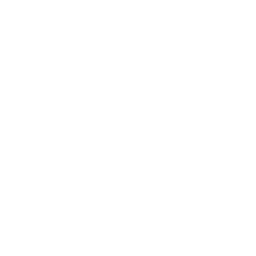

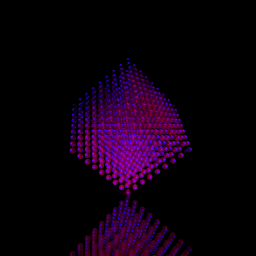

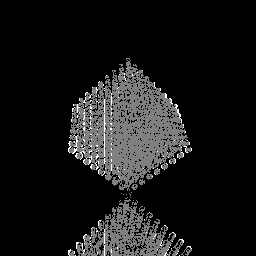

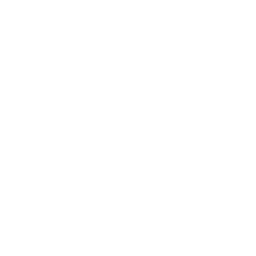

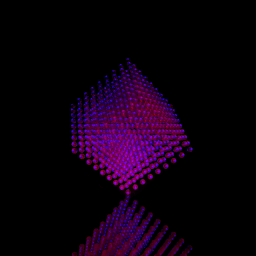

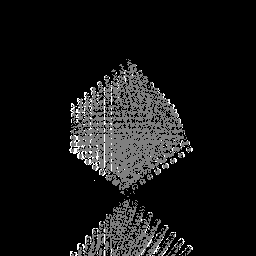

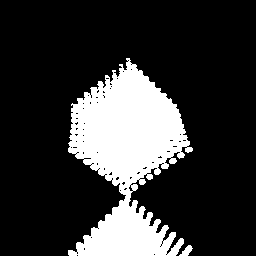

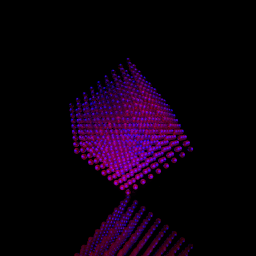

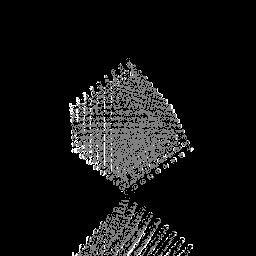

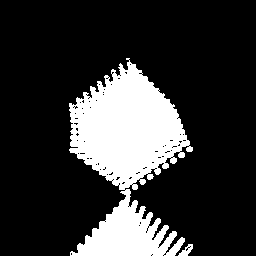

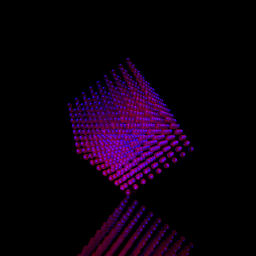

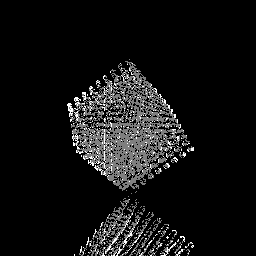

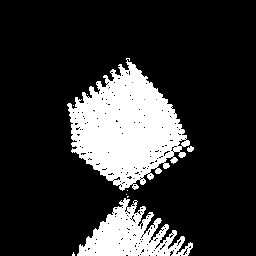

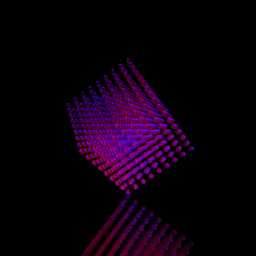

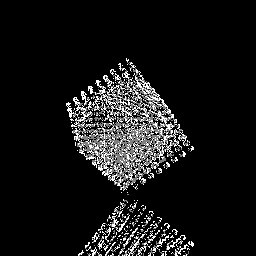

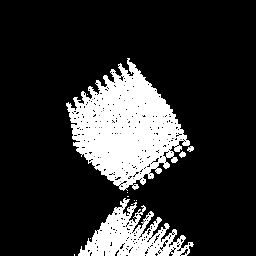

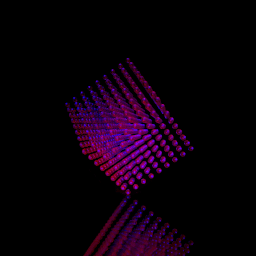

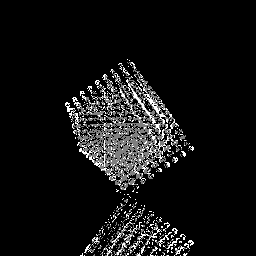

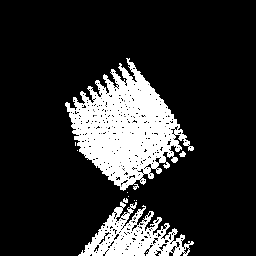

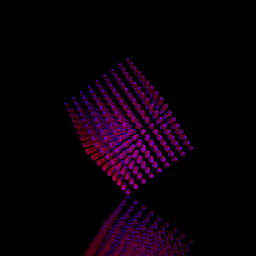

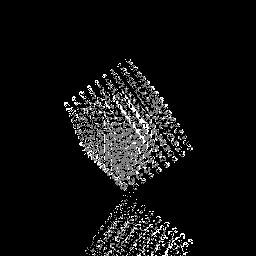

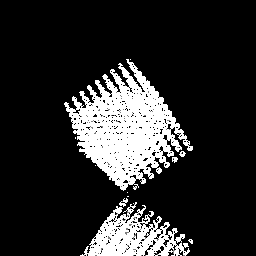

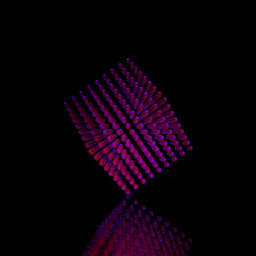

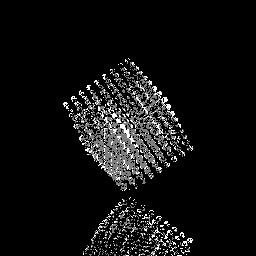

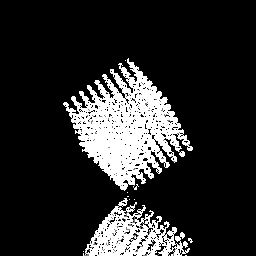

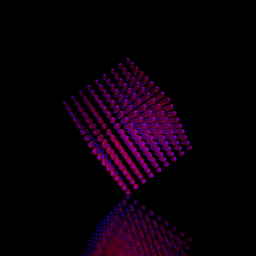

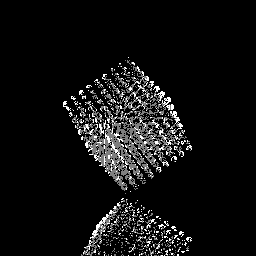

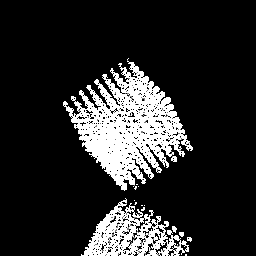

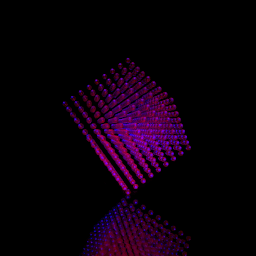

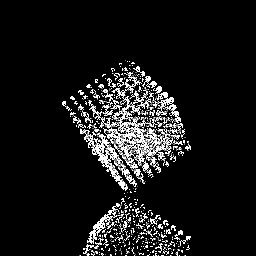

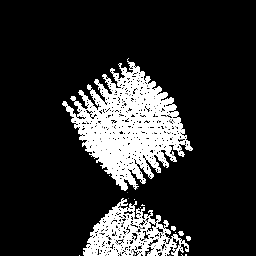

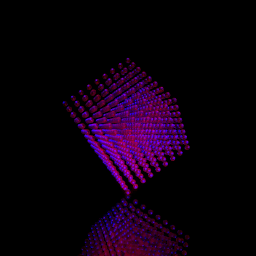

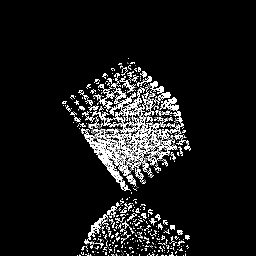

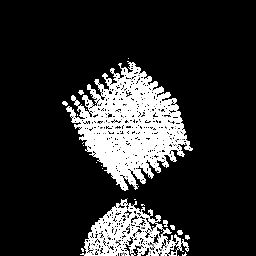

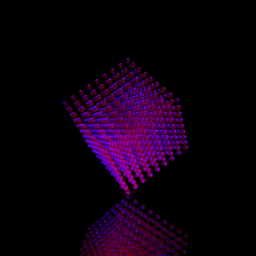

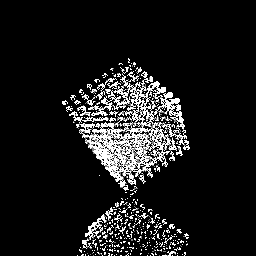

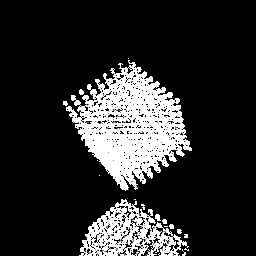

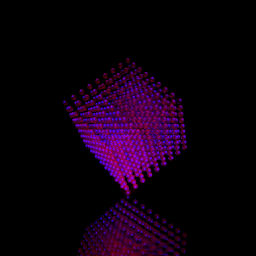

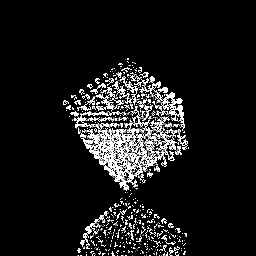

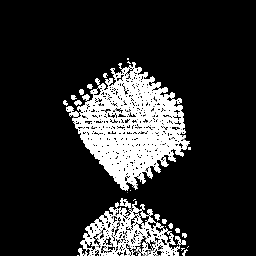

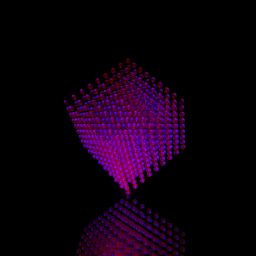

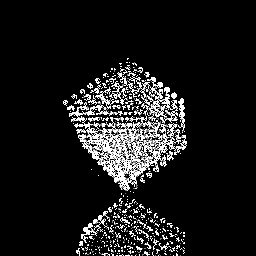

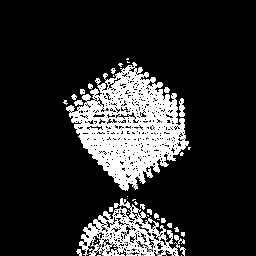

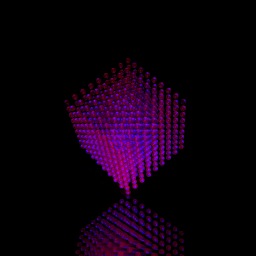

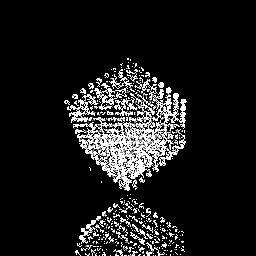

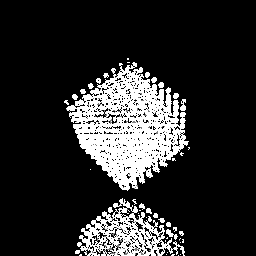

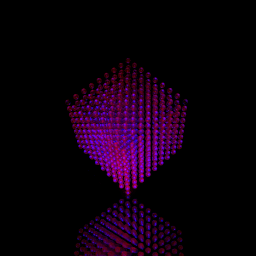

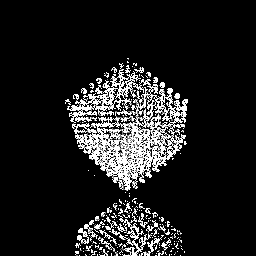

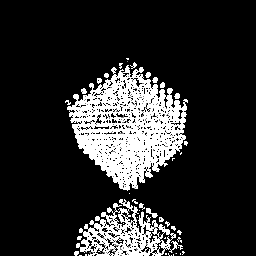

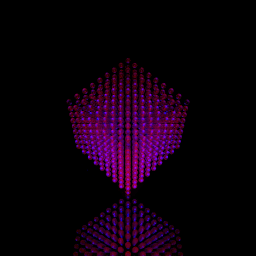

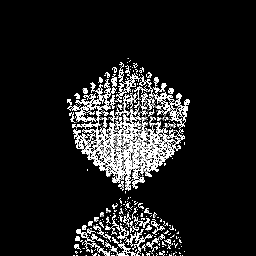

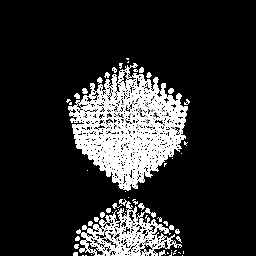

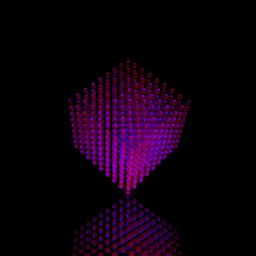

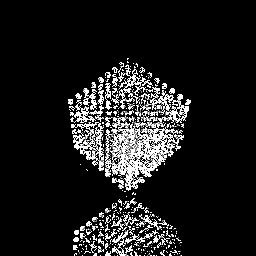

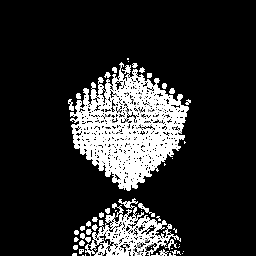

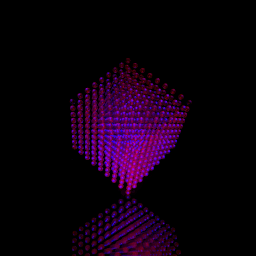

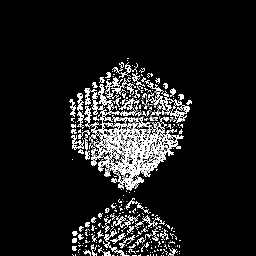

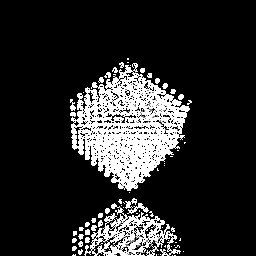

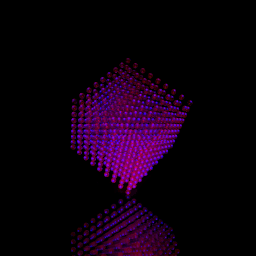

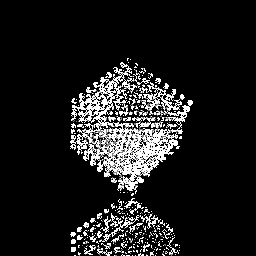

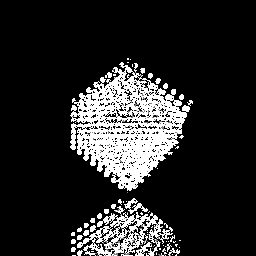

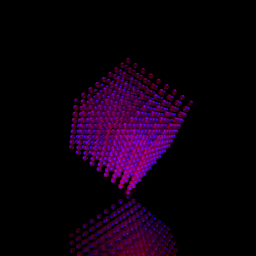

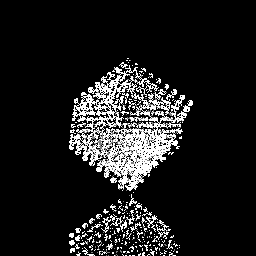

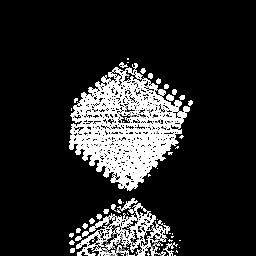

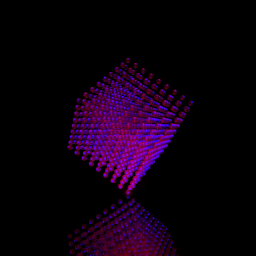

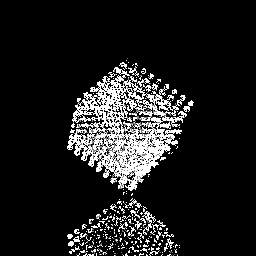

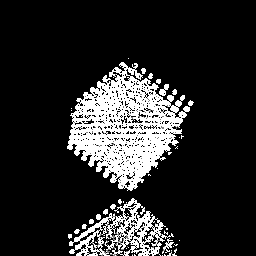

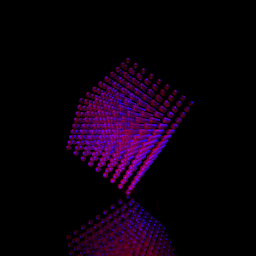

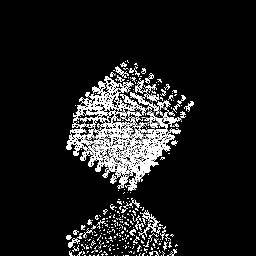

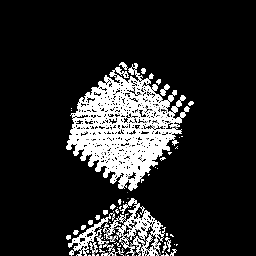

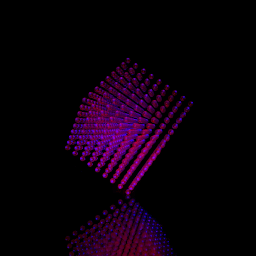

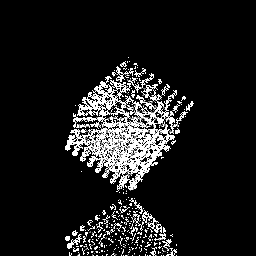

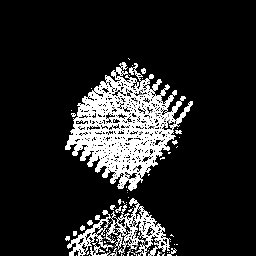

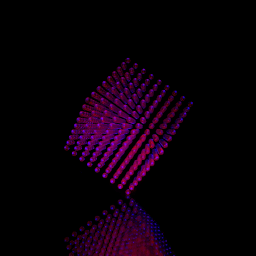

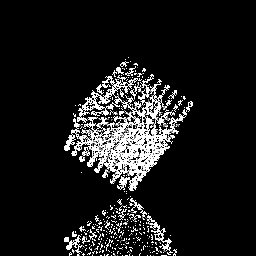

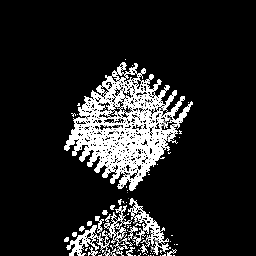

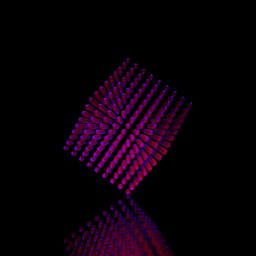

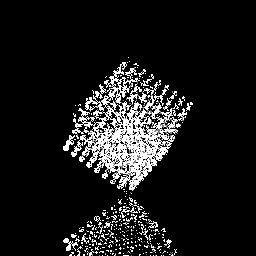

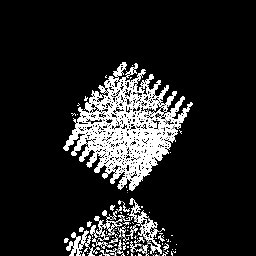

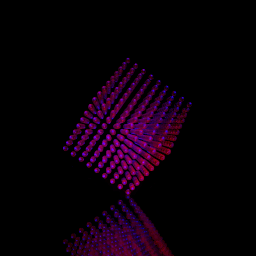

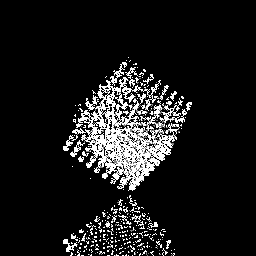

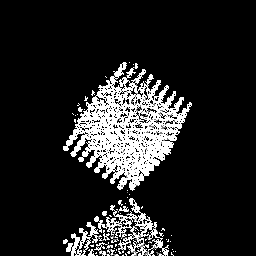

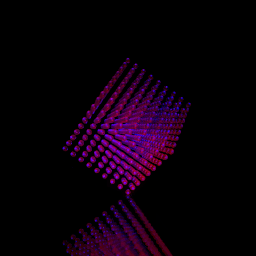

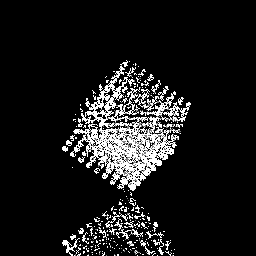

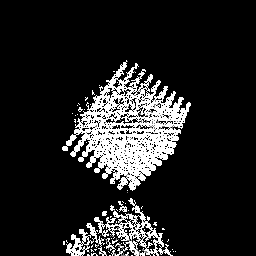

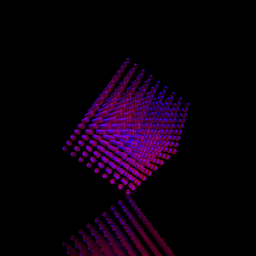

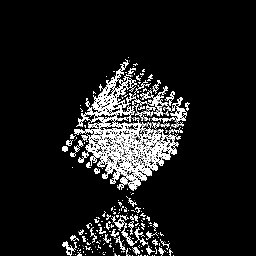

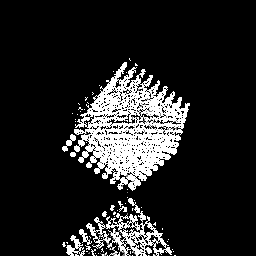

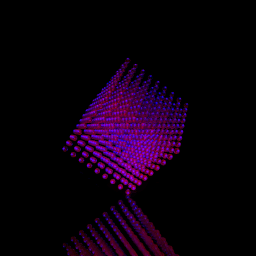

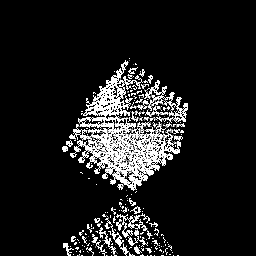

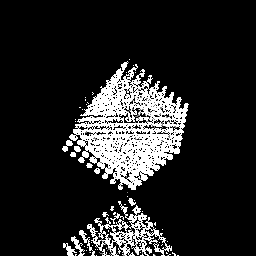

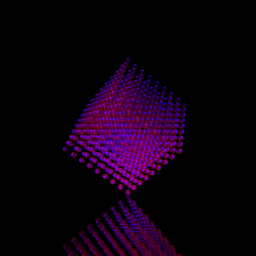

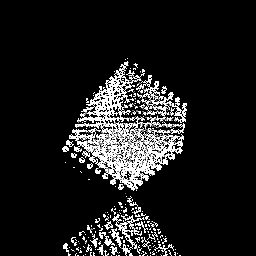

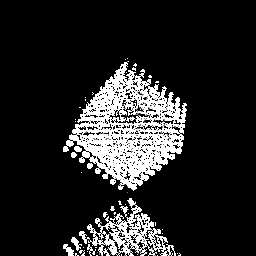

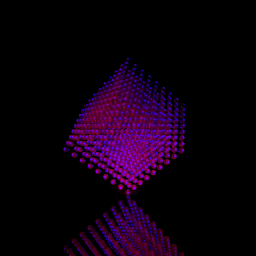

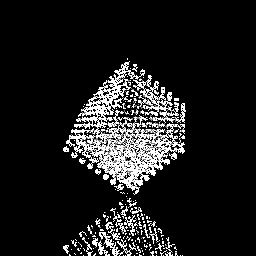

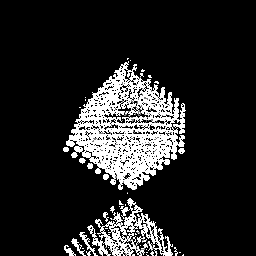

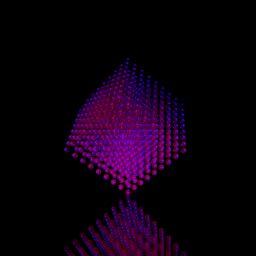

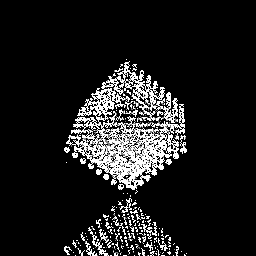

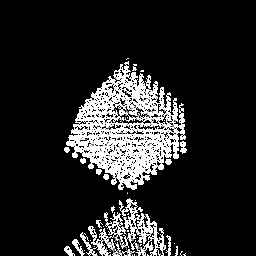

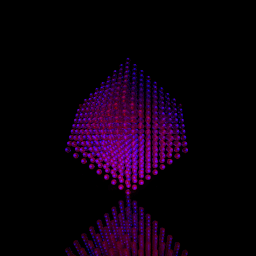

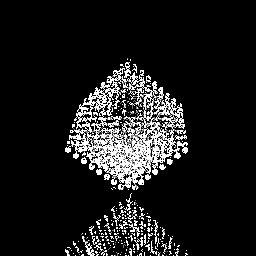

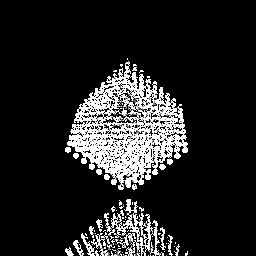

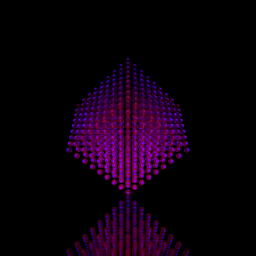

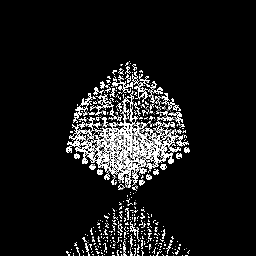

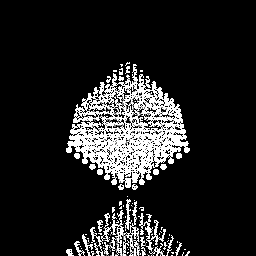

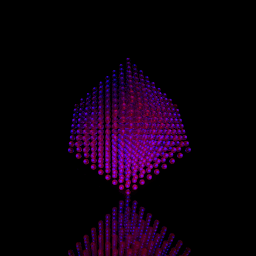

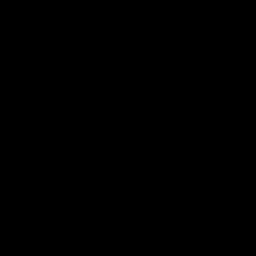

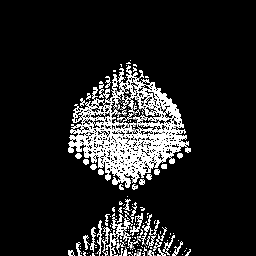

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Initialize background subtractors
bg_subtractor_gmm = cv2.createBackgroundSubtractorMOG2()
bg_subtractor_knn = cv2.createBackgroundSubtractorKNN()

# Load video file instead of webcam
video_path = "/content/drive/MyDrive/gif1.gif"  # Change this to your video file path
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop when video ends

    # Apply background subtraction
    fg_mask_gmm = bg_subtractor_gmm.apply(frame)
    fg_mask_knn = bg_subtractor_knn.apply(frame)

    # Display results using cv2_imshow
    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(fg_mask_gmm)  # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(fg_mask_knn)  # Use cv2_imshow instead of cv2.imshow

    # Press 'q' to exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()